In [134]:
# Data analytics assignment- 6 nations Rugby 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")


In [135]:
df= pd.read_csv(r"C:\Users\CiaranKavanagh\Desktop\6 nations match data.csv")

In [136]:
#Inspect data

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           255 non-null    object 
 1   Diff           255 non-null    int64  
 2   Home Victory   255 non-null    object 
 3   Opposition     255 non-null    object 
 4   Ground         255 non-null    object 
 5   Match Date     255 non-null    object 
 6   year           255 non-null    int64  
 7   opponnents     255 non-null    object 
 8   home_standing  255 non-null    float64
 9   away_standing  255 non-null    float64
 10  temp           255 non-null    int64  
 11  pressure       255 non-null    int64  
 12  wind           255 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 26.0+ KB


In [138]:
df.shape #shows the number of entries and the total number of columns

(255, 13)

In [139]:
df.head() #used to show the first 5 lines from the data set

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
0,Wales,8,Home,v Italy,Millennium Stadium,01/02/2014,2014,Italy,80.19,73.13,3,1019,14
1,France,2,Home,v England,Stade de France,01/02/2014,2014,England,80.87,85.70,0,1017,5
2,France,-5,Away,v Wales,Stade de France,01/02/2019,2019,Wales,77.34,87.26,0,1017,5
3,Ireland,7,Home,v Scotland,Lansdowne Road,01/02/2020,2020,Scotland,84.24,81.21,0,1020,29
4,Wales,42,Home,v Italy,Millennium Stadium,01/02/2020,2020,Italy,79.77,70.88,3,1019,14


In [140]:
df.tail() #used to show the final 5 lines from the dataset
#diff indicates the score margin - number >0 is home win, <0 is away win
#home_standing is world ranking score for home team
#away_standing is world ranking for away team

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
250,Ireland,0,Draw,v France,Lansdowne Road,09/03/2013,2013,France,80.22,85.07,0,1020,29
251,Scotland,-10,Away,v Wales,Murrayfield,09/03/2013,2013,Wales,75.83,78.39,4,1017,7
252,England,11,Home,v Wales,Twickenham,09/03/2014,2014,Wales,85.70,80.19,2,1017,11
253,Scotland,-7,Away,v Wales,Murrayfield,09/03/2019,2019,Wales,81.86,87.26,4,1017,7
254,England,43,Home,v Italy,Twickenham,09/03/2019,2019,Italy,86.23,72.76,2,1017,11


In [141]:
df.columns
# indicates the headings used for each of the 13 columns in the dataset. This can help with indexing for future lines of code

Index(['Team', 'Diff', 'Home Victory', 'Opposition', 'Ground', 'Match Date',
       'year', 'opponnents', 'home_standing', 'away_standing', 'temp',
       'pressure', 'wind'],
      dtype='object')

In [142]:
df.describe()

,Diff,year,home_standing,away_standing,temp,pressure,wind
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,4.490196,2012.000000,80.003686,80.011216,2.811765,1015.701961,13.858824
std,17.678196,4.908614,4.807774,5.009676,2.734271,5.334241,7.928548
min,-53.000000,2004.000000,70.880000,70.880000,0.000000,1004.000000,5.000000
25%,-5.000000,2008.000000,76.645000,76.590000,0.000000,1017.000000,7.000000
50%,6.000000,2012.000000,80.220000,80.190000,2.000000,1017.000000,14.000000
75%,14.500000,2016.000000,82.990000,83.270000,4.000000,1019.000000,17.000000
max,53.000000,2020.000000,93.990000,93.990000,8.000000,1020.000000,29.000000


In [143]:
#clean up of data set

In [144]:
rugby_df = df.copy()

In [145]:
rugby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           255 non-null    object 
 1   Diff           255 non-null    int64  
 2   Home Victory   255 non-null    object 
 3   Opposition     255 non-null    object 
 4   Ground         255 non-null    object 
 5   Match Date     255 non-null    object 
 6   year           255 non-null    int64  
 7   opponnents     255 non-null    object 
 8   home_standing  255 non-null    float64
 9   away_standing  255 non-null    float64
 10  temp           255 non-null    int64  
 11  pressure       255 non-null    int64  
 12  wind           255 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 26.0+ KB


In [146]:
rugby_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Length: 255, dtype: bool

In [147]:
rugby_df.duplicated().sum() # shows that there are no duplicated entries in the dataset

0

In [148]:
rugby_df.isnull()

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False,False,False,False,False


In [149]:
rugby_df.isnull().sum() #shows that there are no blank cells in any of the entries

Team             0
Diff             0
Home Victory     0
Opposition       0
Ground           0
Match Date       0
year             0
opponnents       0
home_standing    0
away_standing    0
temp             0
pressure         0
wind             0
dtype: int64

In [150]:
#if there had been any null values the process would have been to inspect the % of the dataset the null values represented.
#suggested actions: low percentage - replace with 'no data' as will not impact severely on visualization of data, and drop row
# large percentage- combine information from another datasource (pd.concat) to fill missing entries (web scraping)

In [151]:
rugby_df['Match Date']= pd.to_datetime(df['Match Date'])

In [152]:
rugby_df.dtypes

Team                     object
Diff                      int64
Home Victory             object
Opposition               object
Ground                   object
Match Date       datetime64[ns]
year                      int64
opponnents               object
home_standing           float64
away_standing           float64
temp                      int64
pressure                  int64
wind                      int64
dtype: object

In [153]:
#Exploration of dataset

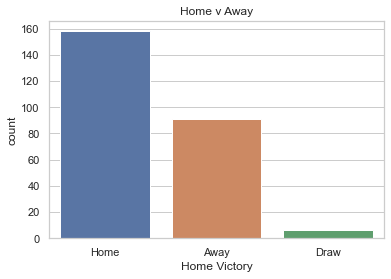

In [154]:
#were there more home or away victories in the 6 nations
sb.set_style("whitegrid")
plt.title("Home v Away")
ax = sb.countplot(x="Home Victory", data= rugby_df)

In [157]:
#who had the most home games?
count_by_home = rugby_df['Team'].value_counts()
count_by_home

France      43
Ireland     43
Wales       43
Scotland    42
England     42
Italy       42
Name: Team, dtype: int64

In [237]:
#Irish ranking points
Irish_rankings_df = rugby_df[(rugby_df['Team']=='Ireland')]
Irish_rankings_df.head()

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
3,Ireland,7,Home,v Scotland,Lansdowne Road,2020-01-02,2020,Scotland,84.24,81.21,0,1020,29
5,Ireland,10,Home,v England,Lansdowne Road,2015-01-03,2015,England,82.13,85.68,0,1020,29
9,Ireland,-6,Away,v England,Lansdowne Road,2013-10-02,2013,England,80.22,83.90,0,1020,29
10,Ireland,37,Home,v Italy,Lansdowne Road,2018-10-02,2018,Italy,86.40,71.27,0,1020,29
15,Ireland,18,Home,v Scotland,Lansdowne Road,2012-10-03,2012,Scotland,80.65,76.20,0,1020,29


In [245]:
rankings = Irish_rankings_df['home_standing']

Text(0.5, 1.0, 'Ireland Rugby Rankings')

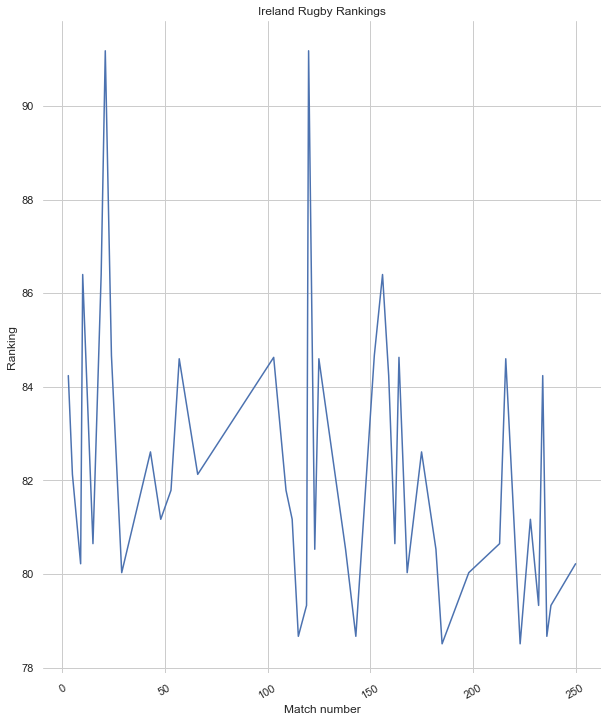

In [255]:
plt.figure(figsize=(10,12))
plt.plot(rankings)
plt.scatter(rankings.index, rankings.values, s=0)
plt.box(on=None)
plt.ylabel('Ranking')
plt.xlabel('Match number')
plt.xticks(rotation= 30)
plt.title('Ireland Rugby Rankings')

In [ ]:
#scatter plot to show when stadiums hosted games

In [158]:
#count of host stadium
count_by_stadium =rugby_df['Ground'].value_counts()
count_by_stadium

Murrayfield           42
Stade de France       42
Rome                  42
Millennium Stadium    42
Twickenham            42
Lansdowne Road        33
Croke Park            10
Llanelli               1
Marseille              1
Name: Ground, dtype: int64

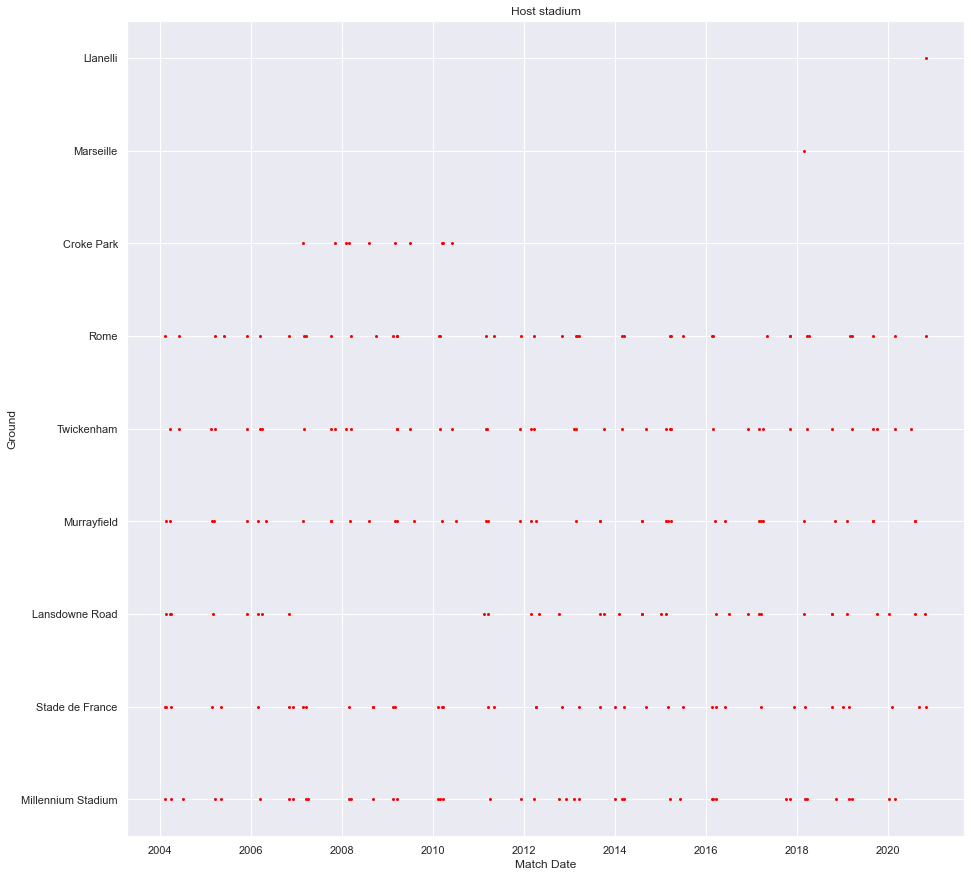

In [164]:
rugby_df.plot(kind='scatter', x='Match Date' , y='Ground', figsize=(15,15), s=4, c= 'red')
plt.title('Host stadium')
plt.show()

In [165]:
opposition_df = rugby_df[(rugby_df['Opposition']=='v Ireland')]
opposition_df.head() #performance of Ireland in away fixtures in the 6 nations

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
13,Scotland,-1,Away,v Ireland,Murrayfield,2007-10-03,2007,Ireland,76.73,84.67,4,1017,7
18,Wales,13,Home,v Ireland,Millennium Stadium,2017-10-03,2017,Ireland,82.56,84.63,3,1019,14
23,France,12,Home,v Ireland,Stade de France,2006-11-02,2006,Ireland,86.10,80.03,0,1017,5
27,Italy,-53,Away,v Ireland,Rome,2017-11-02,2017,Ireland,72.50,84.63,8,1004,17
36,Scotland,-27,Away,v Ireland,Murrayfield,2005-12-02,2005,Ireland,74.65,82.61,4,1017,7


In [167]:
opposition_df['Team'].value_counts() #Ireland has played more times away in France and England

France      9
England     9
Italy       8
Scotland    8
Wales       8
Name: Team, dtype: int64

In [170]:
opposition_df['Home Victory'].value_counts() #away victory number is Ireland performance in away matches

Home    21
Away    20
Draw     1
Name: Home Victory, dtype: int64

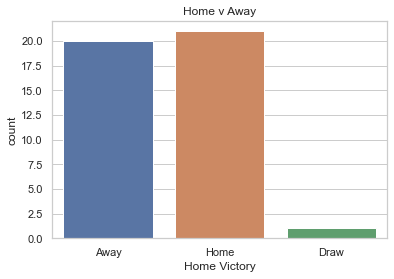

In [175]:
sb.set_style("whitegrid")
plt.title("Home v Away")
ax = sb.countplot(x="Home Victory", data= opposition_df)
#Ireland have won 50% of all away games in 6 nations

In [183]:
#Ireland Toughest opponents
toughest_opponents_df = opposition_df[(opposition_df['Home Victory']=='Home')]
toughest_opponents_df.head()

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind
18,Wales,13,Home,v Ireland,Millennium Stadium,2017-10-03,2017,Ireland,82.56,84.63,3,1019,14
23,France,12,Home,v Ireland,Stade de France,2006-11-02,2006,Ireland,86.10,80.03,0,1017,5
46,Wales,6,Home,v Ireland,Millennium Stadium,2011-12-03,2011,Ireland,77.04,81.79,3,1019,14
52,France,23,Home,v Ireland,Stade de France,2010-02-13,2010,Ireland,82.41,84.60,0,1017,5
55,France,1,Home,v Ireland,Stade de France,2016-02-13,2016,Ireland,79.77,81.17,0,1017,5


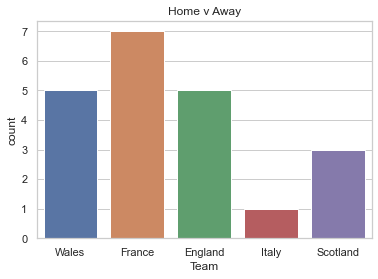

In [278]:
#Ireland Away losses per opponent
sb.set_style("whitegrid")
plt.title("Home v Away")
ax = sb.countplot(x="Team", data= toughest_opponents_df)

In [279]:
#inspecting results from Irish rugby and merging data
IrishRugby_df = pd.read_csv(r'C:\Users\CiaranKavanagh\Desktop\IREMatchData(FULL).csv')
IrishRugby_df.head()

,Team,Date,Result,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss
0,Namibia,19/10/2003,57,Sydney,0,0,21,25,58.76,83.92,7
1,Argentina,26/10/2003,1,Adelaide,0,0,36,32,79.04,83.92,8
2,Australia,01/11/2003,-1,Melbourne,0,0,40,28,84.76,84.95,9
3,France,09/11/2003,-22,Melbourne,0,0,24,21,83.57,83.51,1
4,France,14/02/2004,-18,Stade de France,2,0,16,20,82.71,80.53,1


In [280]:
IrishRugby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Team                              172 non-null    object 
 1   Date                              172 non-null    object 
 2   Result                            172 non-null    int64  
 3   Location                          172 non-null    object 
 4   Opposition Debutants              172 non-null    int64  
 5   Debutants                         172 non-null    int64  
 6   Opposition tries in last 5 games  172 non-null    int64  
 7   Tries in last 5 games             172 non-null    int64  
 8   Opposition Rating                 172 non-null    float64
 9   Rating                            172 non-null    float64
 10  Games since last loss             172 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 14.9+ KB


In [281]:
IrishRugby_df.isnull().sum()

Team                                0
Date                                0
Result                              0
Location                            0
Opposition Debutants                0
Debutants                           0
Opposition tries in last 5 games    0
Tries in last 5 games               0
Opposition Rating                   0
Rating                              0
Games since last loss               0
dtype: int64

In [283]:
IrishRugby_df = IrishRugby_df.rename(columns={'Date': 'Match Date'})
IrishRugby_df = IrishRugby_df.rename(columns={'Result': 'diff'})
IrishRugby_df = IrishRugby_df.rename(columns={'Rating': 'away_standing'})
IrishRugby_df = IrishRugby_df.rename(columns={'Opposition Rating': 'home_standing'})
IrishRugby_df.head()

,Team,Match Date,diff,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,home_standing,away_standing,Games since last loss
0,Namibia,19/10/2003,57,Sydney,0,0,21,25,58.76,83.92,7
1,Argentina,26/10/2003,1,Adelaide,0,0,36,32,79.04,83.92,8
2,Australia,01/11/2003,-1,Melbourne,0,0,40,28,84.76,84.95,9
3,France,09/11/2003,-22,Melbourne,0,0,24,21,83.57,83.51,1
4,France,14/02/2004,-18,Stade de France,2,0,16,20,82.71,80.53,1


In [263]:
IrishRugby_df.columns #checking column headings to align where possible for merge

Index(['Team,', 'Match Date', 'Result', 'Location', 'Opposition Debutants',
       'Debutants', 'Opposition tries in last 5 games',
       'Tries in last 5 games', 'away_standing', 'Rating',
       'Games since last loss'],
      dtype='object')

In [258]:
toughest_opponents_df.columns

Index(['Team', 'Diff', 'Home Victory', 'Opposition', 'Ground', 'Match Date',
       'year', 'opponnents', 'home_standing', 'away_standing', 'temp',
       'pressure', 'wind'],
      dtype='object')

In [295]:
combined = [toughest_opponents_df,IrishRugby_df]
Ireland_Overall = pd.concat(combined)
display(Ireland_Overall)

,Team,Diff,Home Victory,Opposition,Ground,Match Date,year,opponnents,home_standing,away_standing,temp,pressure,wind,diff,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Games since last loss
18,Wales,13.0,Home,v Ireland,Millennium Stadium,2017-10-03 00:00:00,2017.0,Ireland,82.56,84.63,3.0,1019.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,France,12.0,Home,v Ireland,Stade de France,2006-11-02 00:00:00,2006.0,Ireland,86.10,80.03,0.0,1017.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Wales,6.0,Home,v Ireland,Millennium Stadium,2011-12-03 00:00:00,2011.0,Ireland,77.04,81.79,3.0,1019.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,France,23.0,Home,v Ireland,Stade de France,2010-02-13 00:00:00,2010.0,Ireland,82.41,84.60,0.0,1017.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,France,1.0,Home,v Ireland,Stade de France,2016-02-13 00:00:00,2016.0,Ireland,79.77,81.17,0.0,1017.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Australia,NaN,NaN,NaN,NaN,23/06/2018,NaN,NaN,85.41,89.20,NaN,NaN,NaN,4.0,Sydney,0.0,0.0,13.0,14.0,2.0
168,Italy,NaN,NaN,NaN,NaN,03/11/2018,NaN,NaN,72.56,90.12,NaN,NaN,NaN,47.0,Chicago,2.0,2.0,12.0,10.0,3.0
169,Argentina,NaN,NaN,NaN,NaN,10/11/2018,NaN,NaN,78.01,91.17,NaN,NaN,NaN,11.0,Lansdowne Road,2.0,0.0,15.0,14.0,4.0
170,New Zealand,NaN,NaN,NaN,NaN,17/11/2018,NaN,NaN,93.58,90.12,NaN,NaN,NaN,7.0,Lansdowne Road,0.0,0.0,25.0,14.0,5.0


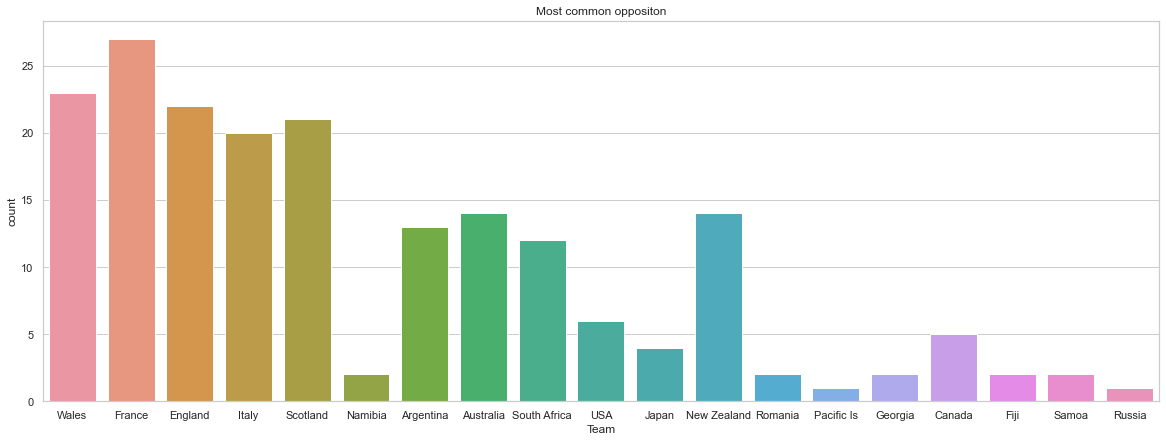

In [305]:
fig = plt.figure(figsize =(20, 7))
sb.set_style("whitegrid")
plt.title("Most common opponents")
ax = sb.countplot(x="Team", data= Ireland_Overall)

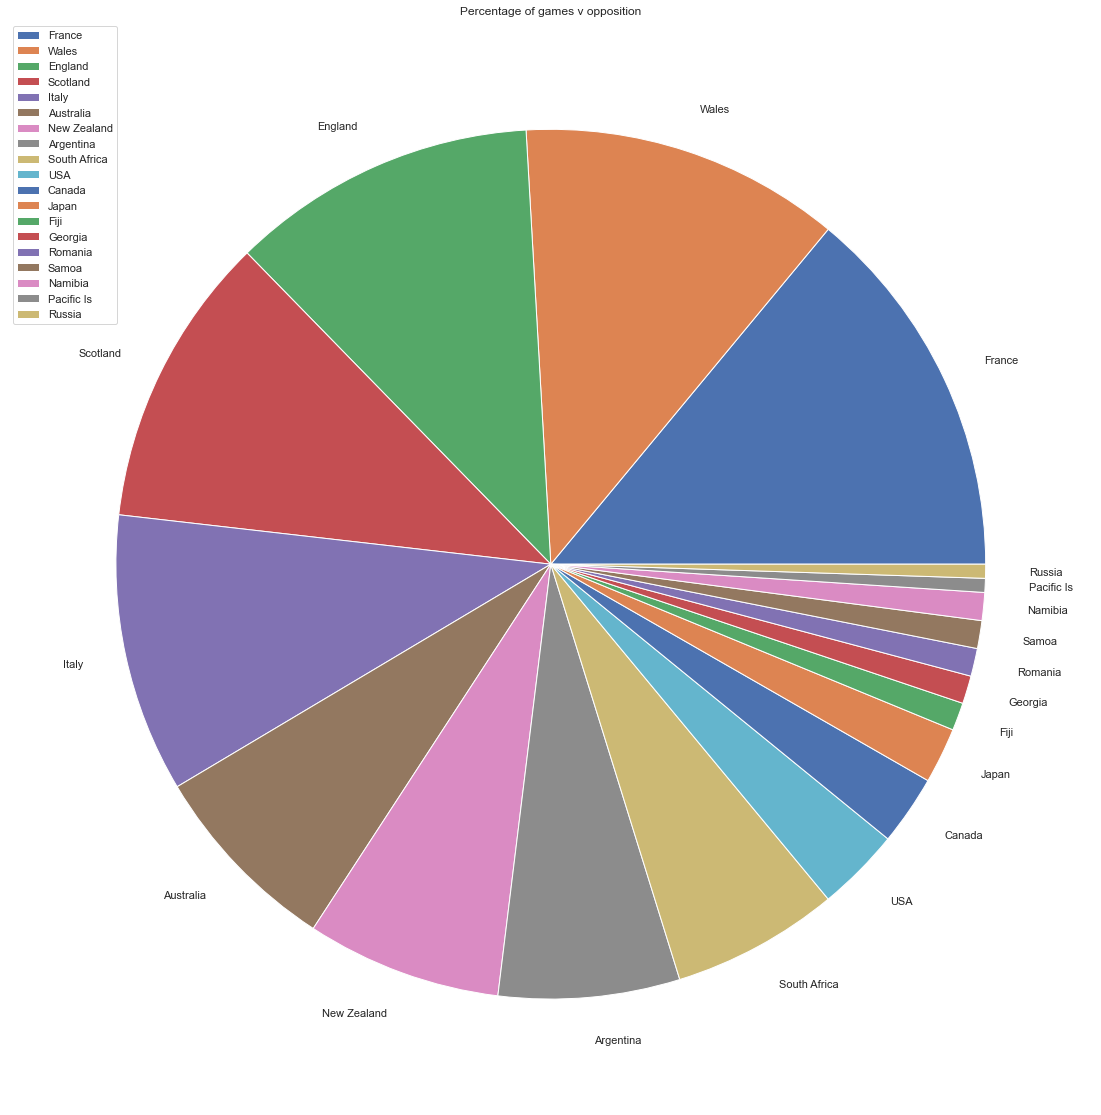

In [310]:
plt.figure(figsize=(20,20))
plt.title('Percentage of games v opposition')
g = plt.pie(Ireland_Overall.Team.value_counts(), labels=Ireland_Overall.Team.value_counts().index)
plt.legend()
plt.show()

In [311]:
#Machine learning- Using key information from datasets we can help predict future Irish results based on opposition
# we can also use other factors such as ranking points and venue to determine likely match outcome

In [ ]:
# using ranking points for home and away teams we can use alinear regression model to help determine the outcome of a game
#adding in additional information (weather, average performance per opposition), we can adapt a more polynomial regression approach to help determine the exact outcome of a match.